In [79]:
import pandas as pd
import numpy as np


DATA CLEANING AND PREPROCESSING

In [80]:
movies_df = pd.read_csv(r'TMDB.csv')
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   movie_id              10000 non-null  int64  
 2   title                 10000 non-null  object 
 3   overview              9915 non-null   object 
 4   keywords              10000 non-null  object 
 5   genres                10000 non-null  object 
 6   release_date          9977 non-null   object 
 7   original_language     10000 non-null  object 
 8   original_title        10000 non-null  object 
 9   production_companies  10000 non-null  object 
 10  revenue               10000 non-null  int64  
 11  status                10000 non-null  object 
 12  tagline               7320 non-null   object 
 13  spoken_languages      10000 non-null  object 
 14  runtime               10000 non-null  int64  
 15  budget              

VISUALIZING THE DATASET

Budget, Revenue, Popularity

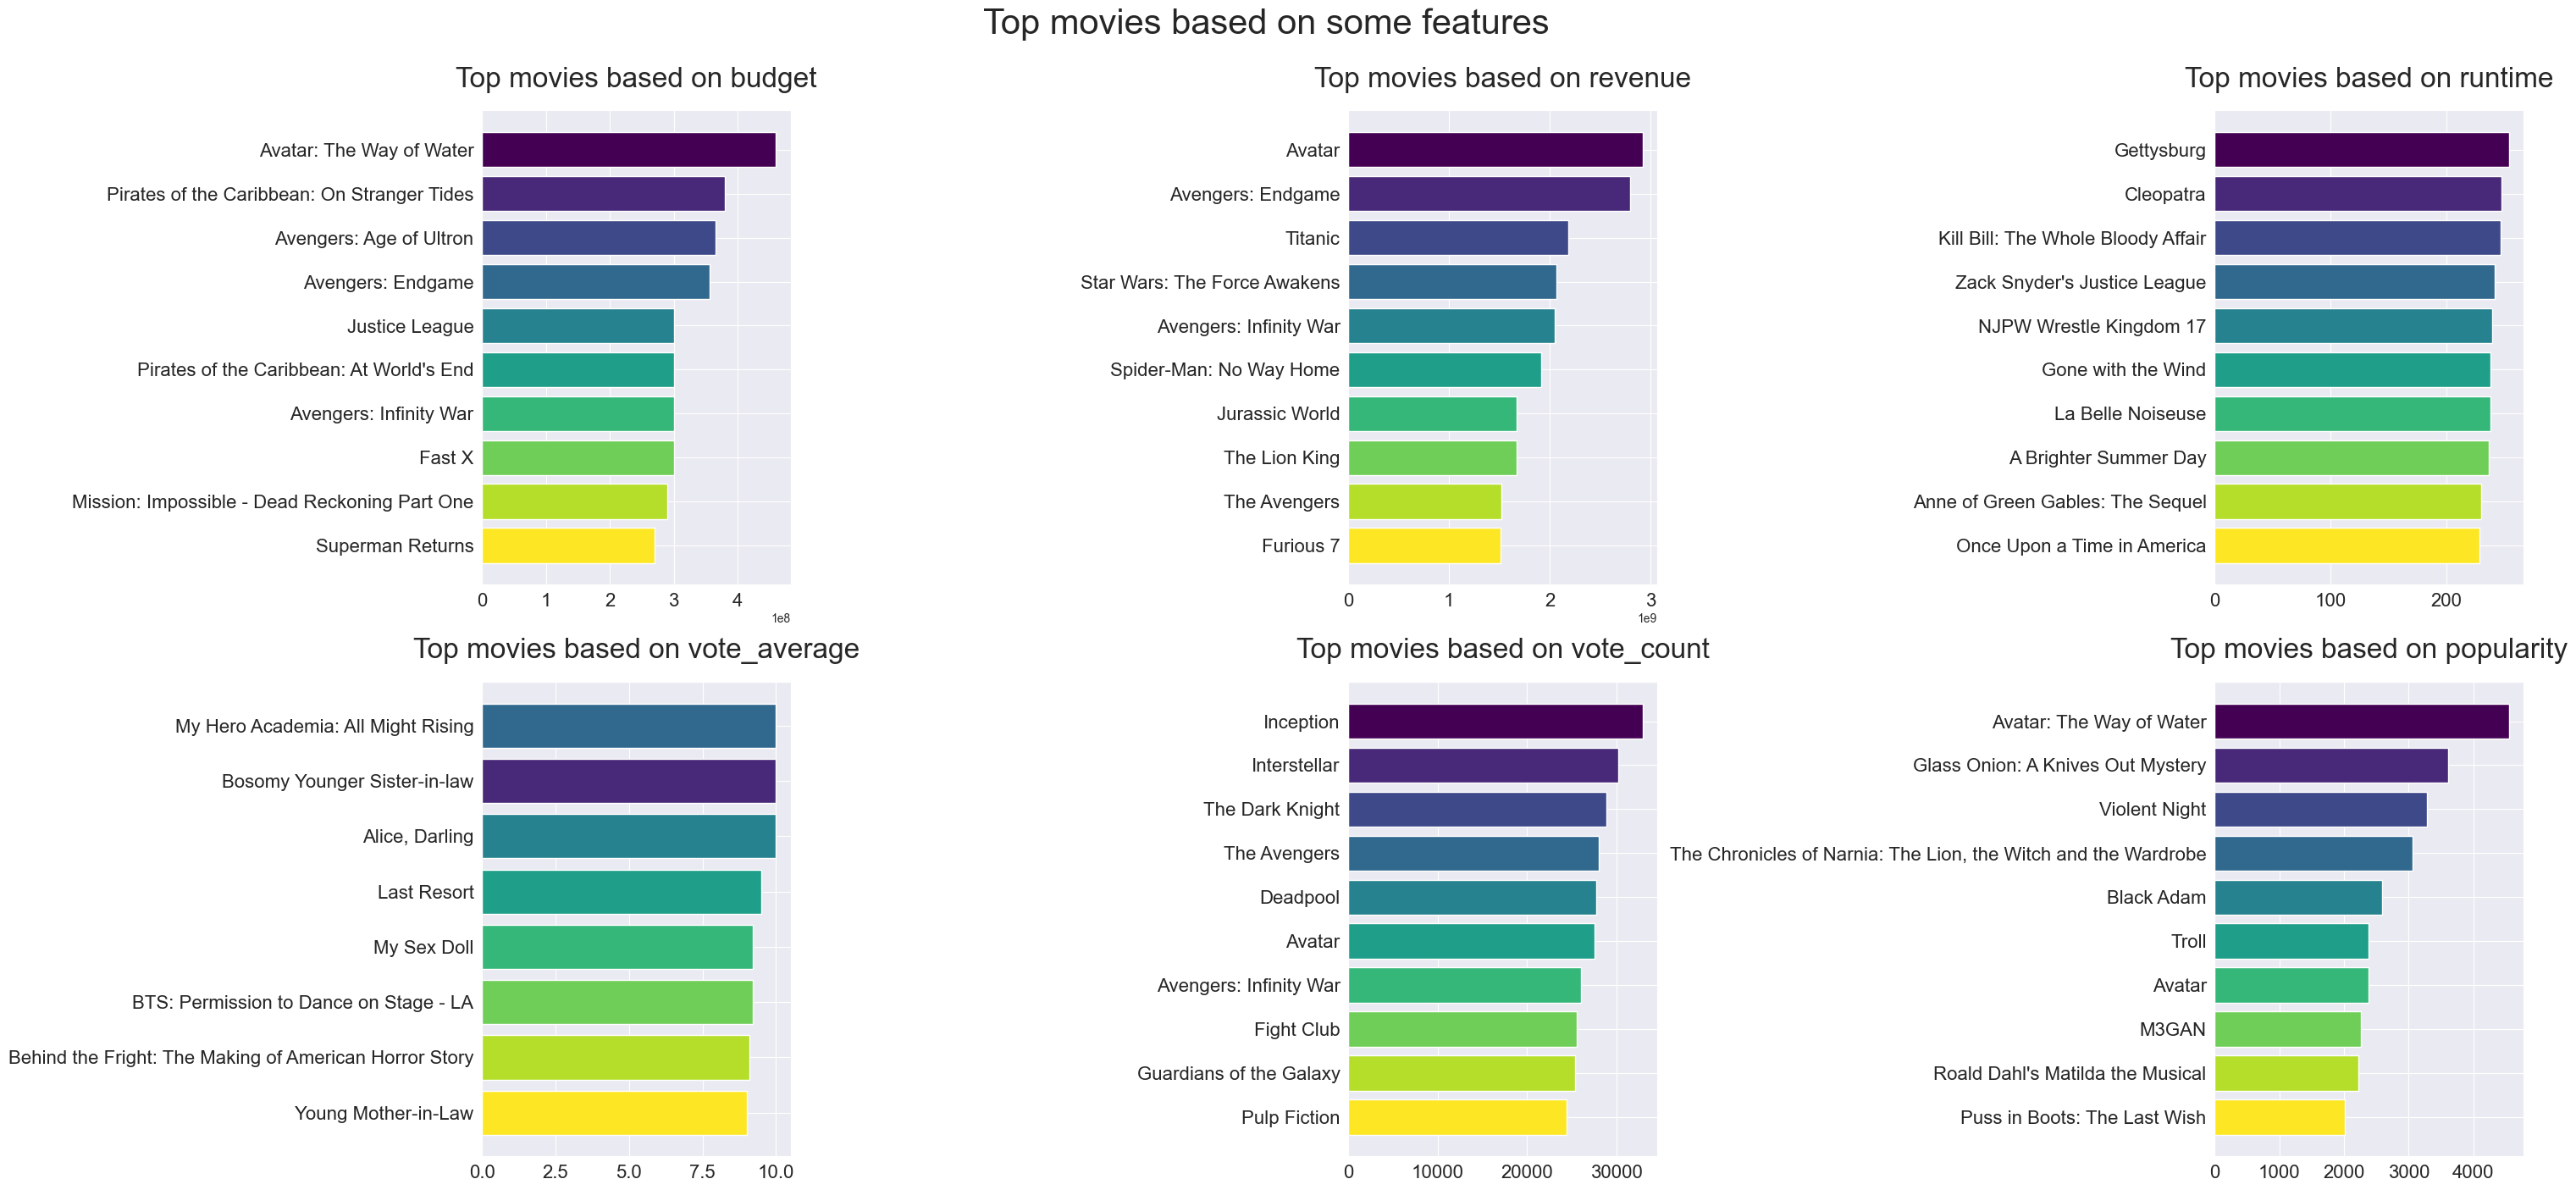

In [81]:
import matplotlib
import matplotlib.pyplot as plt

# Number of top movies to be plotted
top_movie_num = 10

# Features to plot the top movies based on
top_movies_based_on = ["budget", "revenue", "runtime", "vote_average", "vote_count", "popularity"]

# Create a figure and axes object for subplots
fig, ax = plt.subplots(len(top_movies_based_on)//3, 3, figsize=(30,14))

# Define a color map with `top_movie_num` colors
colors = plt.cm.get_cmap('viridis', top_movie_num)

# Iterate through each feature and plot top movies based on that feature
for i, col in enumerate(top_movies_based_on):
    # Get top `top_movie_num` movies based on `col` feature
    top_movies_by = movies_df.sort_values(by=[col], ascending=False).head(top_movie_num)

    # Calculate row and column number for subplot
    r, c = i//3, i%3

    # Plot top movies as horizontal bar chart in subplot
    ax[r][c].barh(top_movies_by["title"], top_movies_by[col], color=colors.colors)

    # Set title for subplot
    ax[r][c].set_title(f"Top movies based on {col}", fontsize=24, pad=20)

    # Set font size for tick labels
    ax[r][c].tick_params(axis='both', which='major', labelsize=16)

    # Invert y-axis so that the titles appear right-side up
    ax[r][c].invert_yaxis()

# Set super title for entire figure
plt.suptitle('Top movies based on some features',fontsize=30, y=1)

# Adjust spacing between subplots
fig.tight_layout()


In [82]:
#selecting the columns that are needed
movies_df = movies_df[['movie_id','title','overview','genres','keywords','cast','crew','vote_count','vote_average']]
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      10000 non-null  int64  
 1   title         10000 non-null  object 
 2   overview      9915 non-null   object 
 3   genres        10000 non-null  object 
 4   keywords      10000 non-null  object 
 5   cast          10000 non-null  object 
 6   crew          10000 non-null  object 
 7   vote_count    10000 non-null  int64  
 8   vote_average  10000 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB


In [83]:
movies_df.head(5)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,Set more than a decade after the events of the...,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...","[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...","[{'id': 703, 'name': 'detective'}, {'id': 1200...","[{'adult': False, 'gender': 2, 'id': 8784, 'kn...","[{'adult': False, 'gender': 2, 'id': 1226, 'kn...",2204,7.083
2,899112,Violent Night,When a team of mercenaries breaks into a wealt...,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'adult': False, 'gender': 2, 'id': 35029, 'k...","[{'adult': False, 'gender': 2, 'id': 6114, 'kn...",805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[{'id': 12, 'name': 'Adventure'}, {'id': 10751...","[{'id': 83, 'name': 'saving the world'}, {'id'...","[{'adult': False, 'gender': 2, 'id': 5527, 'kn...","[{'adult': False, 'gender': 2, 'id': 1095, 'kn...",9108,7.108
4,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...","[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...","[{'id': 952, 'name': 'lightning'}, {'id': 2095...","[{'adult': False, 'gender': 2, 'id': 18918, 'k...","[{'adult': False, 'gender': 2, 'id': 3687, 'kn...",3544,7.216


In [84]:
#checking the total sum of null values in the dataset
movies_df.isnull().sum()

movie_id         0
title            0
overview        85
genres           0
keywords         0
cast             0
crew             0
vote_count       0
vote_average     0
dtype: int64

In [85]:
#dropping the rows of the overview column
movies_df.dropna(inplace=True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9915 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      9915 non-null   int64  
 1   title         9915 non-null   object 
 2   overview      9915 non-null   object 
 3   genres        9915 non-null   object 
 4   keywords      9915 non-null   object 
 5   cast          9915 non-null   object 
 6   crew          9915 non-null   object 
 7   vote_count    9915 non-null   int64  
 8   vote_average  9915 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 774.6+ KB


In [86]:
#checking for duplicates
movies_df.duplicated().sum()


1028

In [87]:
movies_df.drop_duplicates(inplace=True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      8887 non-null   int64  
 1   title         8887 non-null   object 
 2   overview      8887 non-null   object 
 3   genres        8887 non-null   object 
 4   keywords      8887 non-null   object 
 5   cast          8887 non-null   object 
 6   crew          8887 non-null   object 
 7   vote_count    8887 non-null   int64  
 8   vote_average  8887 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 694.3+ KB


Preprocessing the genres column

In [88]:
movies_df.head(10)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,Set more than a decade after the events of the...,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...","[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...","[{'id': 703, 'name': 'detective'}, {'id': 1200...","[{'adult': False, 'gender': 2, 'id': 8784, 'kn...","[{'adult': False, 'gender': 2, 'id': 1226, 'kn...",2204,7.083
2,899112,Violent Night,When a team of mercenaries breaks into a wealt...,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'adult': False, 'gender': 2, 'id': 35029, 'k...","[{'adult': False, 'gender': 2, 'id': 6114, 'kn...",805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[{'id': 12, 'name': 'Adventure'}, {'id': 10751...","[{'id': 83, 'name': 'saving the world'}, {'id'...","[{'adult': False, 'gender': 2, 'id': 5527, 'kn...","[{'adult': False, 'gender': 2, 'id': 1095, 'kn...",9108,7.108
4,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...","[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...","[{'id': 952, 'name': 'lightning'}, {'id': 2095...","[{'adult': False, 'gender': 2, 'id': 18918, 'k...","[{'adult': False, 'gender': 2, 'id': 3687, 'kn...",3544,7.216
5,736526,Troll,"Deep inside the mountain of Dovre, something g...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...","[{'id': 1262, 'name': 'mountain'}, {'id': 5457...","[{'adult': False, 'gender': 1, 'id': 1394758, ...","[{'adult': False, 'gender': 2, 'id': 20308, 'k...",940,6.647
6,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",27566,7.558
7,536554,M3GAN,A brilliant toy company roboticist uses artifi...,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...","[{'id': 9707, 'name': 'evil doll'}, {'id': 123...","[{'adult': False, 'gender': 1, 'id': 1255540, ...","[{'adult': False, 'gender': 1, 'id': 494, 'kno...",91,7.110
8,668482,Roald Dahl's Matilda the Musical,An extraordinary young girl discovers her supe...,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...","[{'id': 291, 'name': 'circus'}, {'id': 295, 'n...","[{'adult': False, 'gender': 1, 'id': 2442117, ...","[{'adult': False, 'gender': 2, 'id': 463, 'kno...",255,6.822
9,740952,Savage Salvation,Newly engaged Shelby John and Ruby Red want a ...,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...","[{'id': 9748, 'name': 'revenge'}, {'id': 15593...","[{'adult': False, 'gender': 2, 'id': 54738, 'k...","[{'adult': False, 'gender': 2, 'id': 17210, 'k...",24,5.500


In [89]:
movies_df.iloc[0].genres

"[{'id': 878, 'name': 'Science Fiction'}, {'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}]"

In [90]:
#Since genres are in string format, i will need to convert them , for further processing using the ast library to return a list of the genres

import ast
def process(genre):
    final = []
    for i in ast.literal_eval(genre):
        final.append(i['name'])
    return final

In [91]:
movies_df['genres']=movies_df['genres'].apply(process)
movies_df.head(10)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,Set more than a decade after the events of the...,"[Science Fiction, Adventure, Action]","[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...,"[Mystery, Thriller, Comedy]","[{'id': 703, 'name': 'detective'}, {'id': 1200...","[{'adult': False, 'gender': 2, 'id': 8784, 'kn...","[{'adult': False, 'gender': 2, 'id': 1226, 'kn...",2204,7.083
2,899112,Violent Night,When a team of mercenaries breaks into a wealt...,"[Action, Comedy, Crime, Thriller]","[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'adult': False, 'gender': 2, 'id': 35029, 'k...","[{'adult': False, 'gender': 2, 'id': 6114, 'kn...",805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[Adventure, Family, Fantasy]","[{'id': 83, 'name': 'saving the world'}, {'id'...","[{'adult': False, 'gender': 2, 'id': 5527, 'kn...","[{'adult': False, 'gender': 2, 'id': 1095, 'kn...",9108,7.108
4,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...","[Action, Fantasy, Science Fiction]","[{'id': 952, 'name': 'lightning'}, {'id': 2095...","[{'adult': False, 'gender': 2, 'id': 18918, 'k...","[{'adult': False, 'gender': 2, 'id': 3687, 'kn...",3544,7.216
5,736526,Troll,"Deep inside the mountain of Dovre, something g...","[Fantasy, Action, Adventure]","[{'id': 1262, 'name': 'mountain'}, {'id': 5457...","[{'adult': False, 'gender': 1, 'id': 1394758, ...","[{'adult': False, 'gender': 2, 'id': 20308, 'k...",940,6.647
6,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",27566,7.558
7,536554,M3GAN,A brilliant toy company roboticist uses artifi...,"[Horror, Science Fiction, Thriller]","[{'id': 9707, 'name': 'evil doll'}, {'id': 123...","[{'adult': False, 'gender': 1, 'id': 1255540, ...","[{'adult': False, 'gender': 1, 'id': 494, 'kno...",91,7.110
8,668482,Roald Dahl's Matilda the Musical,An extraordinary young girl discovers her supe...,"[Family, Comedy, Fantasy]","[{'id': 291, 'name': 'circus'}, {'id': 295, 'n...","[{'adult': False, 'gender': 1, 'id': 2442117, ...","[{'adult': False, 'gender': 2, 'id': 463, 'kno...",255,6.822
9,740952,Savage Salvation,Newly engaged Shelby John and Ruby Red want a ...,"[Action, Thriller, Crime, Drama]","[{'id': 9748, 'name': 'revenge'}, {'id': 15593...","[{'adult': False, 'gender': 2, 'id': 54738, 'k...","[{'adult': False, 'gender': 2, 'id': 17210, 'k...",24,5.500


Visualizing the genres

(0.0, 100.0, 0.0, 100.0)

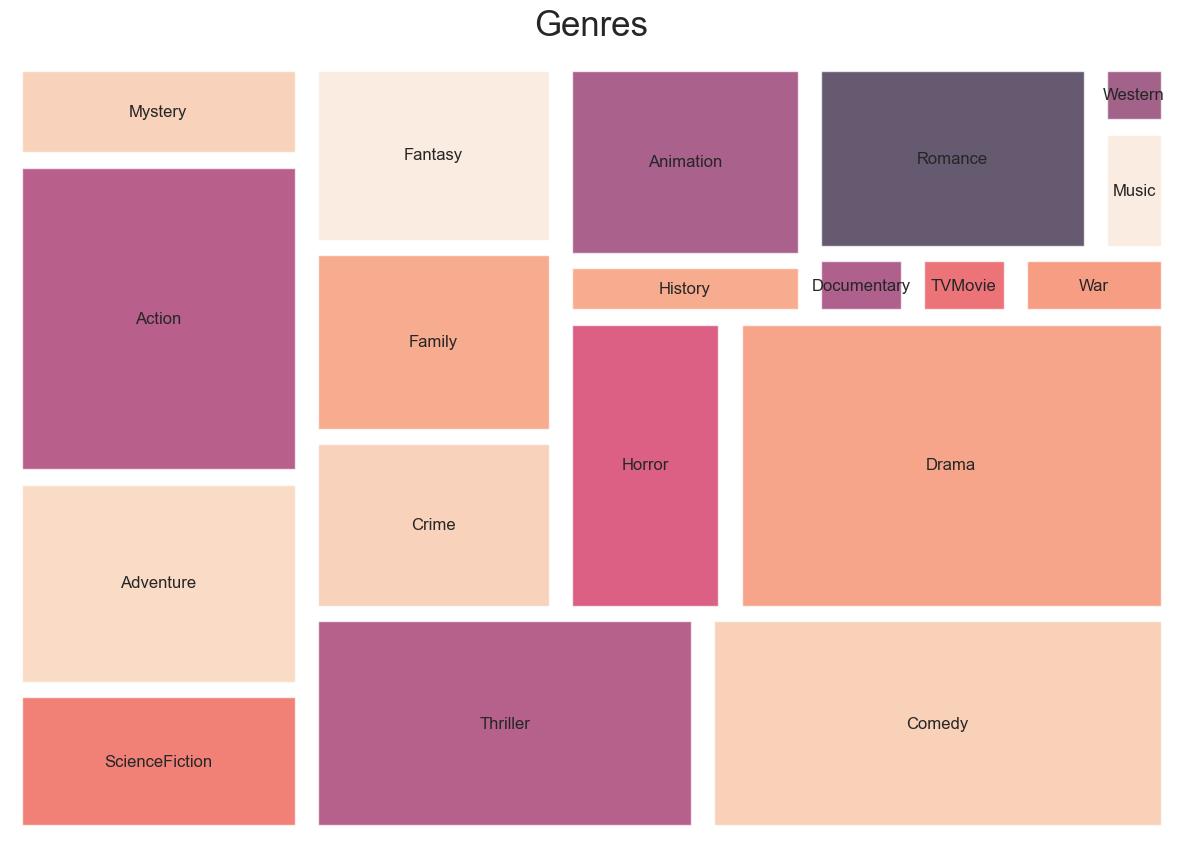

In [108]:
# import libraries
from collections import defaultdict, Counter
import squarify

# gather genres information and create Counter object
genres_flatten = sum(movies_df["genres"].values, []) # flatten genres column (list of lists) to single list
genres_info = Counter(genres_flatten) # count frequency of each genre

# create a figure and label with title
plt.figure(figsize=(15, 10))
plt.title("Genres", fontsize=25, pad=20)

# plot genre frequency using squarify
squarify.plot(genres_info.values(), label=genres_info.keys(), text_kwargs={'fontsize':12}, bar_kwargs={'alpha':.7}, pad=True)

# turn off axis for clear view
plt.axis("off")


In [93]:
#convert keywords to return list of keywords
movies_df['keywords']=movies_df['keywords'].apply(process)
movies_df.head(10)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,Set more than a decade after the events of the...,"[Science Fiction, Adventure, Action]","[loss of loved one, dying and death, alien lif...","[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...,"[Mystery, Thriller, Comedy]","[detective, greece, investigation, satire, seq...","[{'adult': False, 'gender': 2, 'id': 8784, 'kn...","[{'adult': False, 'gender': 2, 'id': 1226, 'kn...",2204,7.083
2,899112,Violent Night,When a team of mercenaries breaks into a wealt...,"[Action, Comedy, Crime, Thriller]","[holiday, santa claus, mercenary, saving chris...","[{'adult': False, 'gender': 2, 'id': 35029, 'k...","[{'adult': False, 'gender': 2, 'id': 6114, 'kn...",805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[Adventure, Family, Fantasy]","[saving the world, sibling relationship, witch...","[{'adult': False, 'gender': 2, 'id': 5527, 'kn...","[{'adult': False, 'gender': 2, 'id': 1095, 'kn...",9108,7.108
4,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...","[Action, Fantasy, Science Fiction]","[lightning, anti hero, superhero, based on com...","[{'adult': False, 'gender': 2, 'id': 18918, 'k...","[{'adult': False, 'gender': 2, 'id': 3687, 'kn...",3544,7.216
5,736526,Troll,"Deep inside the mountain of Dovre, something g...","[Fantasy, Action, Adventure]","[mountain, mythical creature, creature, norweg...","[{'adult': False, 'gender': 1, 'id': 1394758, ...","[{'adult': False, 'gender': 2, 'id': 20308, 'k...",940,6.647
6,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",27566,7.558
7,536554,M3GAN,A brilliant toy company roboticist uses artifi...,"[Horror, Science Fiction, Thriller]","[evil doll, aunt niece relationship, orphan, c...","[{'adult': False, 'gender': 1, 'id': 1255540, ...","[{'adult': False, 'gender': 1, 'id': 494, 'kno...",91,7.110
8,668482,Roald Dahl's Matilda the Musical,An extraordinary young girl discovers her supe...,"[Family, Comedy, Fantasy]","[circus, library, corruption, child abuse, mag...","[{'adult': False, 'gender': 1, 'id': 2442117, ...","[{'adult': False, 'gender': 2, 'id': 463, 'kno...",255,6.822
9,740952,Savage Salvation,Newly engaged Shelby John and Ruby Red want a ...,"[Action, Thriller, Crime, Drama]","[revenge, recovering addict, police pursuit, o...","[{'adult': False, 'gender': 2, 'id': 54738, 'k...","[{'adult': False, 'gender': 2, 'id': 17210, 'k...",24,5.500


In [94]:
#same thing to cast and crews
movies_df['cast']=movies_df['cast'].apply(process)
movies_df['crew']=movies_df['crew'].apply(process)
movies_df.head(10)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,Set more than a decade after the events of the...,"[Science Fiction, Adventure, Action]","[loss of loved one, dying and death, alien lif...","[Sam Worthington, Zoe Saldaña, Sigourney Weave...","[Stephen E. Rivkin, David Valdes, David Valdes...",3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...,"[Mystery, Thriller, Comedy]","[detective, greece, investigation, satire, seq...","[Daniel Craig, Edward Norton, Janelle Monáe, K...","[Rick Heinrichs, John Dexter, Mary Vernieu, To...",2204,7.083
2,899112,Violent Night,When a team of mercenaries breaks into a wealt...,"[Action, Comedy, Crime, Thriller]","[holiday, santa claus, mercenary, saving chris...","[David Harbour, John Leguizamo, Beverly D'Ange...","[Marc S. Fischer, David Leitch, Jim Page, Jona...",805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[Adventure, Family, Fantasy]","[saving the world, sibling relationship, witch...","[Skandar Keynes, Georgie Henley, William Mosel...","[Donald McAlpine, Liz Mullane, Sala Baker, Gai...",9108,7.108
4,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...","[Action, Fantasy, Science Fiction]","[lightning, anti hero, superhero, based on com...","[Dwayne Johnson, Aldis Hodge, Noah Centineo, S...","[Harry Cohen, Eric McLeod, Beat Frutiger, Lawr...",3544,7.216
5,736526,Troll,"Deep inside the mountain of Dovre, something g...","[Fantasy, Action, Adventure]","[mountain, mythical creature, creature, norweg...","[Ine Marie Wilmann, Kim S. Falck-Jørgensen, Ma...","[Espen Sandberg, Harald Zwart, Roar Uthaug, Ro...",940,6.647
6,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldaña, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",27566,7.558
7,536554,M3GAN,A brilliant toy company roboticist uses artifi...,"[Horror, Science Fiction, Thriller]","[evil doll, aunt niece relationship, orphan, c...","[Allison Williams, Violet McGraw, Jenna Davis,...","[Terri Taylor, James Wan, James Wan, Kim Sincl...",91,7.110
8,668482,Roald Dahl's Matilda the Musical,An extraordinary young girl discovers her supe...,"[Family, Comedy, Fantasy]","[circus, library, corruption, child abuse, mag...","[Alisha Weir, Emma Thompson, Lashana Lynch, St...","[Jonathan Finn, Roald Dahl, Roald Dahl, Tim Be...",255,6.822
9,740952,Savage Salvation,Newly engaged Shelby John and Ruby Red want a ...,"[Action, Thriller, Crime, Drama]","[revenge, recovering addict, police pursuit, o...","[Jack Huston, Robert De Niro, John Malkovich, ...","[George Furla, Randall Emmett, Randall Emmett,...",24,5.500


In [95]:
#overview is in string format so we will be converting it into list
movies_df['overview'] = movies_df['overview'].apply(lambda x:x.split())
movies_df.head(10)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,"[Set, more, than, a, decade, after, the, event...","[Science Fiction, Adventure, Action]","[loss of loved one, dying and death, alien lif...","[Sam Worthington, Zoe Saldaña, Sigourney Weave...","[Stephen E. Rivkin, David Valdes, David Valdes...",3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,"[World-famous, detective, Benoit, Blanc, heads...","[Mystery, Thriller, Comedy]","[detective, greece, investigation, satire, seq...","[Daniel Craig, Edward Norton, Janelle Monáe, K...","[Rick Heinrichs, John Dexter, Mary Vernieu, To...",2204,7.083
2,899112,Violent Night,"[When, a, team, of, mercenaries, breaks, into,...","[Action, Comedy, Crime, Thriller]","[holiday, santa claus, mercenary, saving chris...","[David Harbour, John Leguizamo, Beverly D'Ange...","[Marc S. Fischer, David Leitch, Jim Page, Jona...",805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","[Siblings, Lucy,, Edmund,, Susan, and, Peter, ...","[Adventure, Family, Fantasy]","[saving the world, sibling relationship, witch...","[Skandar Keynes, Georgie Henley, William Mosel...","[Donald McAlpine, Liz Mullane, Sala Baker, Gai...",9108,7.108
4,436270,Black Adam,"[Nearly, 5,000, years, after, he, was, bestowe...","[Action, Fantasy, Science Fiction]","[lightning, anti hero, superhero, based on com...","[Dwayne Johnson, Aldis Hodge, Noah Centineo, S...","[Harry Cohen, Eric McLeod, Beat Frutiger, Lawr...",3544,7.216
5,736526,Troll,"[Deep, inside, the, mountain, of, Dovre,, some...","[Fantasy, Action, Adventure]","[mountain, mythical creature, creature, norweg...","[Ine Marie Wilmann, Kim S. Falck-Jørgensen, Ma...","[Espen Sandberg, Harald Zwart, Roar Uthaug, Ro...",940,6.647
6,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldaña, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",27566,7.558
7,536554,M3GAN,"[A, brilliant, toy, company, roboticist, uses,...","[Horror, Science Fiction, Thriller]","[evil doll, aunt niece relationship, orphan, c...","[Allison Williams, Violet McGraw, Jenna Davis,...","[Terri Taylor, James Wan, James Wan, Kim Sincl...",91,7.110
8,668482,Roald Dahl's Matilda the Musical,"[An, extraordinary, young, girl, discovers, he...","[Family, Comedy, Fantasy]","[circus, library, corruption, child abuse, mag...","[Alisha Weir, Emma Thompson, Lashana Lynch, St...","[Jonathan Finn, Roald Dahl, Roald Dahl, Tim Be...",255,6.822
9,740952,Savage Salvation,"[Newly, engaged, Shelby, John, and, Ruby, Red,...","[Action, Thriller, Crime, Drama]","[revenge, recovering addict, police pursuit, o...","[Jack Huston, Robert De Niro, John Malkovich, ...","[George Furla, Randall Emmett, Randall Emmett,...",24,5.500


In [96]:
#removing spaces in between words
movies_df['genres'] = movies_df['genres'].apply(lambda x:[i.replace(" ", "") for i in x])

In [97]:
movies_df['keywords'] = movies_df['keywords'].apply(lambda x:[i.replace(" ", "") for i in x])

In [98]:
movies_df['cast'] = movies_df['cast'].apply(lambda x:[i.replace(" ", "") for i in x])

In [99]:
movies_df['crew'] = movies_df['crew'].apply(lambda x:[i.replace(" ", "") for i in x])

In [100]:
movies_df.head(20)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,"[Set, more, than, a, decade, after, the, event...","[ScienceFiction, Adventure, Action]","[lossoflovedone, dyinganddeath, alienlife-form...","[SamWorthington, ZoeSaldaña, SigourneyWeaver, ...","[StephenE.Rivkin, DavidValdes, DavidValdes, Jo...",3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,"[World-famous, detective, Benoit, Blanc, heads...","[Mystery, Thriller, Comedy]","[detective, greece, investigation, satire, seq...","[DanielCraig, EdwardNorton, JanelleMonáe, Kath...","[RickHeinrichs, JohnDexter, MaryVernieu, TomKa...",2204,7.083
2,899112,Violent Night,"[When, a, team, of, mercenaries, breaks, into,...","[Action, Comedy, Crime, Thriller]","[holiday, santaclaus, mercenary, savingchristm...","[DavidHarbour, JohnLeguizamo, BeverlyD'Angelo,...","[MarcS.Fischer, DavidLeitch, JimPage, Jonathan...",805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","[Siblings, Lucy,, Edmund,, Susan, and, Peter, ...","[Adventure, Family, Fantasy]","[savingtheworld, siblingrelationship, witch, b...","[SkandarKeynes, GeorgieHenley, WilliamMoseley,...","[DonaldMcAlpine, LizMullane, SalaBaker, GailSt...",9108,7.108
4,436270,Black Adam,"[Nearly, 5,000, years, after, he, was, bestowe...","[Action, Fantasy, ScienceFiction]","[lightning, antihero, superhero, basedoncomic,...","[DwayneJohnson, AldisHodge, NoahCentineo, Sara...","[HarryCohen, EricMcLeod, BeatFrutiger, Lawrenc...",3544,7.216
5,736526,Troll,"[Deep, inside, the, mountain, of, Dovre,, some...","[Fantasy, Action, Adventure]","[mountain, mythicalcreature, creature, norwegi...","[IneMarieWilmann, KimS.Falck-Jørgensen, MadsSj...","[EspenSandberg, HaraldZwart, RoarUthaug, RoarU...",940,6.647
6,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldaña, SigourneyWeaver, ...","[StephenE.Rivkin, RickCarter, ChristopherBoyes...",27566,7.558
7,536554,M3GAN,"[A, brilliant, toy, company, roboticist, uses,...","[Horror, ScienceFiction, Thriller]","[evildoll, auntniecerelationship, orphan, cara...","[AllisonWilliams, VioletMcGraw, JennaDavis, Am...","[TerriTaylor, JamesWan, JamesWan, KimSinclair,...",91,7.110
8,668482,Roald Dahl's Matilda the Musical,"[An, extraordinary, young, girl, discovers, he...","[Family, Comedy, Fantasy]","[circus, library, corruption, childabuse, magi...","[AlishaWeir, EmmaThompson, LashanaLynch, Steph...","[JonathanFinn, RoaldDahl, RoaldDahl, TimBevan,...",255,6.822
9,740952,Savage Salvation,"[Newly, engaged, Shelby, John, and, Ruby, Red,...","[Action, Thriller, Crime, Drama]","[revenge, recoveringaddict, policepursuit, opi...","[JackHuston, RobertDeNiro, JohnMalkovich, Will...","[GeorgeFurla, RandallEmmett, RandallEmmett, Ni...",24,5.500
